In [1]:
%matplotlib inline

seed_value = 100
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats

# Data uploading

In [2]:
AIRPORT_ICAO = "ESSA"

RUNWAYS = ['08', '01L', '01R', '26', '19R', '19L']
CLUSTERS = [1,2,3,4,5,6]

DATA_DIR = os.path.join("..", "..")
DATA_DIR = os.path.join(DATA_DIR, "..")
DATA_DIR = os.path.join(DATA_DIR, "data")
DATA_DIR = os.path.join(DATA_DIR, "Regression")

# WIF
rwy_metrics_WIF_fuel_by_hour_df_list = [] # list of lists

# TIF
rwy_metrics_TIF_fuel_by_hour_df_list = [] # list of lists

i = 0
for runway in RUNWAYS:
    rwy_metrics_WIF_fuel_by_hour_df_list.append([])
    rwy_metrics_TIF_fuel_by_hour_df_list.append([])

    for cluster in CLUSTERS:
        filename = AIRPORT_ICAO + "_metrics_WIF_fuel_by_hour_rwy" + runway + "_cluster" + str(cluster) + ".csv"
        full_filename = os.path.join(DATA_DIR, filename)
        temp_df = pd.read_csv(full_filename, sep=' ')
        rwy_metrics_WIF_fuel_by_hour_df_list[i].append(temp_df)

        filename = AIRPORT_ICAO + "_metrics_TIF_fuel_by_hour_rwy" + runway + "_cluster" + str(cluster) + ".csv"
        full_filename = os.path.join(DATA_DIR, filename)
        temp_df = pd.read_csv(full_filename, sep=' ')
        rwy_metrics_TIF_fuel_by_hour_df_list[i].append(temp_df)

    i = i+1

# Average Additional Fuel

## Medians of Average Additional Fuel in TMA vs TIF

C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1.928
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.259
Time:                        15:10:06   Log-Likelihood:                -23.780
No. Observations:                   5   AIC:                             51.56
Df Residuals:                       3   BIC:                             50.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.1364     41.818      2.658      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     4.890
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.270
Time:                        15:10:06   Log-Likelihood:                -12.204
No. Observations:                   3   AIC:                             28.41
Df Residuals:                       1   BIC:                             26.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.1859     51.126      4.678      0.1

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     3.935
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.142
Time:                        15:10:06   Log-Likelihood:                -26.736
No. Observations:                   5   AIC:                             57.47
Df Residuals:                       3   BIC:                             56.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.9219     61.960      0.435      0.6

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                 -0.459
Method:                 Least Squares   F-statistic:                    0.3709
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.652
Time:                        15:10:06   Log-Likelihood:                -13.880
No. Observations:                   3   AIC:                             31.76
Df Residuals:                       1   BIC:                             29.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.1728     94.132      0.937      0.5

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.186
Method:                 Least Squares   F-statistic:                   0.05812
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.819
Time:                        15:10:07   Log-Likelihood:                -29.595
No. Observations:                   7   AIC:                             63.19
Df Residuals:                       5   BIC:                             63.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.0842     23.464      1.964      0.1

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 26 May 2022   Prob (F-statistic):                nan
Time:                        15:10:07   Log-Likelihood:                 56.287
No. Observations:                   2   AIC:                            -108.6
Df Residuals:                       0   BIC:                            -111.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        473.7940        inf          0        n

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                 -0.057
Method:                 Least Squares   F-statistic:                    0.5682
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.476
Time:                        15:10:07   Log-Likelihood:                -40.218
No. Observations:                   9   AIC:                             84.44
Df Residuals:                       7   BIC:                             84.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8662     17.389      2.120      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     5.244
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0558
Time:                        15:10:08   Log-Likelihood:                -40.847
No. Observations:                   9   AIC:                             85.69
Df Residuals:                       7   BIC:                             86.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.8580     18.649      0.850      0.4

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.104
Method:                 Least Squares   F-statistic:                    0.2441
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.636
Time:                        15:10:08   Log-Likelihood:                -32.642
No. Observations:                   9   AIC:                             69.28
Df Residuals:                       7   BIC:                             69.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.4323      7.493      5.796      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     3.564
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.108
Time:                        15:10:08   Log-Likelihood:                -37.177
No. Observations:                   8   AIC:                             78.35
Df Residuals:                       6   BIC:                             78.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.5487     26.789      1.103      0.3

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.109
Method:                 Least Squares   F-statistic:                    0.2169
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.656
Time:                        15:10:08   Log-Likelihood:                -32.741
No. Observations:                   9   AIC:                             69.48
Df Residuals:                       7   BIC:                             69.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.5395      7.577      4.955      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     3.769
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0933
Time:                        15:10:09   Log-Likelihood:                -41.143
No. Observations:                   9   AIC:                             86.29
Df Residuals:                       7   BIC:                             86.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.4606     19.271      1.944      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     36.57
Date:                Thu, 26 May 2022   Prob (F-statistic):           0.000517
Time:                        15:10:09   Log-Likelihood:                -34.055
No. Observations:                   9   AIC:                             72.11
Df Residuals:                       7   BIC:                             72.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3734     10.178      0.037      0.9

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     3.489
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0987
Time:                        15:10:09   Log-Likelihood:                -45.516
No. Observations:                  10   AIC:                             95.03
Df Residuals:                       8   BIC:                             95.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.5227     17.516      1.914      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     20.14
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00284
Time:                        15:10:10   Log-Likelihood:                -38.595
No. Observations:                   9   AIC:                             81.19
Df Residuals:                       7   BIC:                             81.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.3472     16.854      1.623      0.1

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     7.881
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0262
Time:                        15:10:10   Log-Likelihood:                -39.296
No. Observations:                   9   AIC:                             82.59
Df Residuals:                       7   BIC:                             82.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.8477     18.220      3.230      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     13.86
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00743
Time:                        15:10:10   Log-Likelihood:                -36.159
No. Observations:                   9   AIC:                             76.32
Df Residuals:                       7   BIC:                             76.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.6399     12.858      5.338      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     14.81
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00489
Time:                        15:10:10   Log-Likelihood:                -47.239
No. Observations:                  10   AIC:                             98.48
Df Residuals:                       8   BIC:                             99.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1294     20.810     -0.006      0.9

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     2.057
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.195
Time:                        15:10:11   Log-Likelihood:                -30.970
No. Observations:                   9   AIC:                             65.94
Df Residuals:                       7   BIC:                             66.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.8926      6.223      8.821      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     5.056
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0593
Time:                        15:10:11   Log-Likelihood:                -30.103
No. Observations:                   9   AIC:                             64.21
Df Residuals:                       7   BIC:                             64.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.5520      5.651      3.460      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     21.51
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00238
Time:                        15:10:11   Log-Likelihood:                -29.585
No. Observations:                   9   AIC:                             63.17
Df Residuals:                       7   BIC:                             63.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.7140      5.335     11.942      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                 -0.092
Method:                 Least Squares   F-statistic:                    0.3253
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.586
Time:                        15:10:12   Log-Likelihood:                -27.737
No. Observations:                   9   AIC:                             59.47
Df Residuals:                       7   BIC:                             59.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.2784      4.345      6.278      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.8078
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.399
Time:                        15:10:12   Log-Likelihood:                -40.805
No. Observations:                   9   AIC:                             85.61
Df Residuals:                       7   BIC:                             86.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.1959     18.561      2.166      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.118
Method:                 Least Squares   F-statistic:                    0.1560
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.705
Time:                        15:10:12   Log-Likelihood:                -38.043
No. Observations:                   9   AIC:                             80.09
Df Residuals:                       7   BIC:                             80.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.5909     13.656      3.924      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     4.506
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0780
Time:                        15:10:13   Log-Likelihood:                -34.542
No. Observations:                   8   AIC:                             73.08
Df Residuals:                       6   BIC:                             73.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.8376     16.333      5.745      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.125
Method:                 Least Squares   F-statistic:                    0.2243
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.653
Time:                        15:10:13   Log-Likelihood:                -39.612
No. Observations:                   8   AIC:                             83.22
Df Residuals:                       6   BIC:                             83.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.0802     29.401      2.928      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                 -0.123
Method:                 Least Squares   F-statistic:                    0.3433
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.583
Time:                        15:10:13   Log-Likelihood:                -35.129
No. Observations:                   7   AIC:                             74.26
Df Residuals:                       5   BIC:                             74.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.0214     36.581      2.926      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     1.702
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.262
Time:                        15:10:13   Log-Likelihood:                -19.481
No. Observations:                   6   AIC:                             42.96
Df Residuals:                       4   BIC:                             42.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6664     10.489      1.208      0.2

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     1.929
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.214
Time:                        15:10:14   Log-Likelihood:                -38.185
No. Observations:                   8   AIC:                             80.37
Df Residuals:                       6   BIC:                             80.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.0287     25.751      0.817      0.4

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     9.699
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0264
Time:                        15:10:14   Log-Likelihood:                -29.230
No. Observations:                   7   AIC:                             62.46
Df Residuals:                       5   BIC:                             62.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.3931     18.963      3.554      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     1.406
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.270
Time:                        15:10:14   Log-Likelihood:                -38.323
No. Observations:                  10   AIC:                             80.65
Df Residuals:                       8   BIC:                             81.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5437      8.532      4.166      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     11.74
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0110
Time:                        15:10:15   Log-Likelihood:                -29.209
No. Observations:                   9   AIC:                             62.42
Df Residuals:                       7   BIC:                             62.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.2925      5.940      2.743      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1.462
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.261
Time:                        15:10:15   Log-Likelihood:                -37.017
No. Observations:                  10   AIC:                             78.03
Df Residuals:                       8   BIC:                             78.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        122.9432      7.488     16.419      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     18.57
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00258
Time:                        15:10:15   Log-Likelihood:                -42.622
No. Observations:                  10   AIC:                             89.24
Df Residuals:                       8   BIC:                             89.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2488     13.115     -0.476      0.6

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\1069499573.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.205
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.309
Time:                        15:10:15   Log-Likelihood:                -41.315
No. Observations:                   9   AIC:                             86.63
Df Residuals:                       7   BIC:                             87.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.9344     22.802      2.015      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


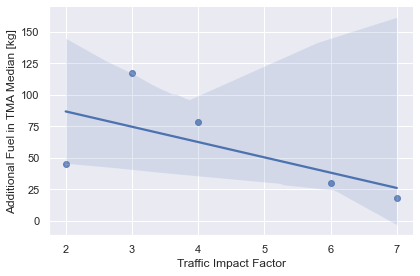

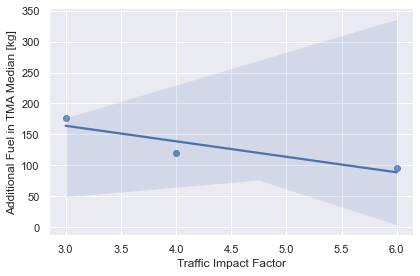

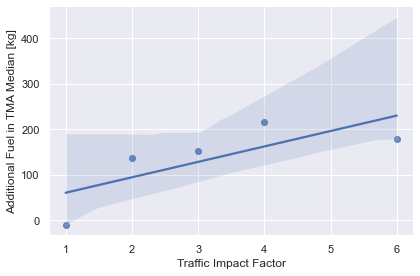

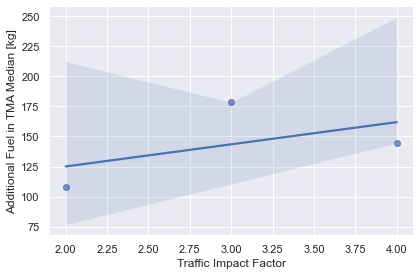

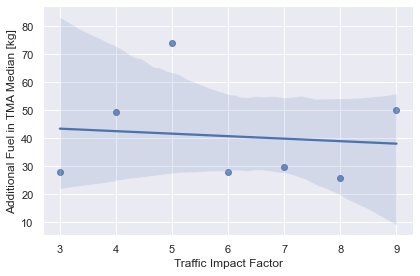

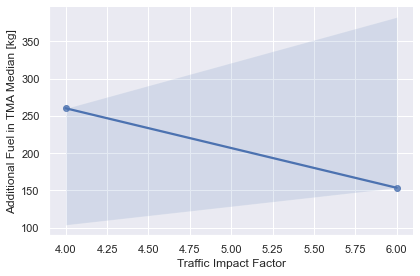

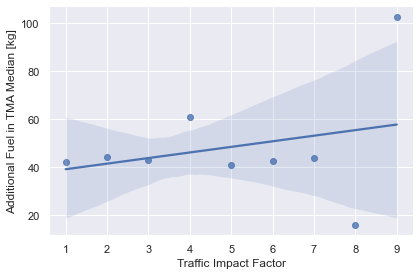

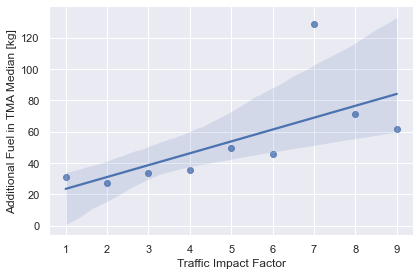

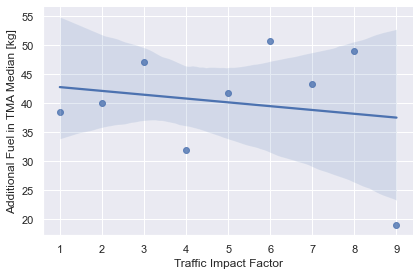

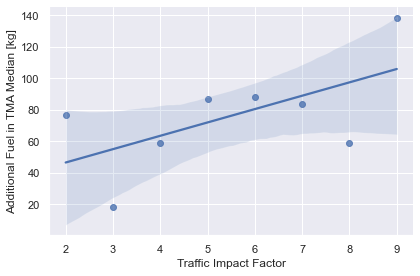

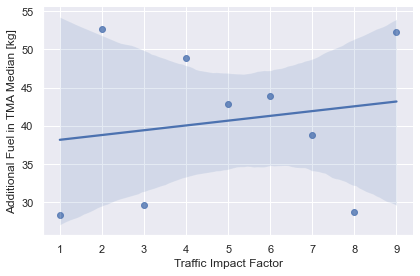

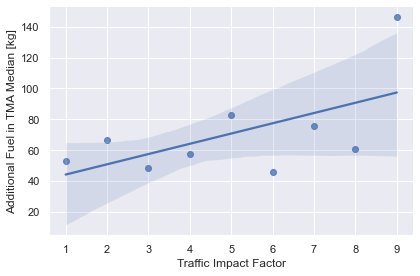

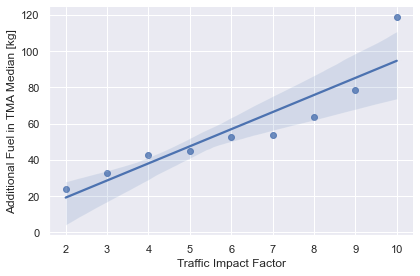

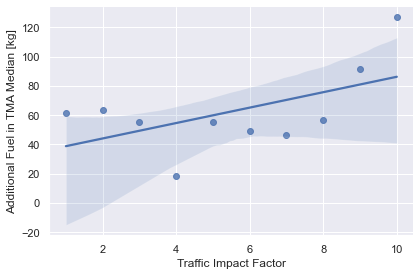

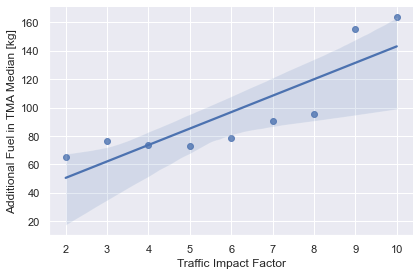

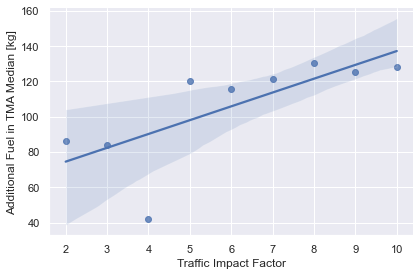

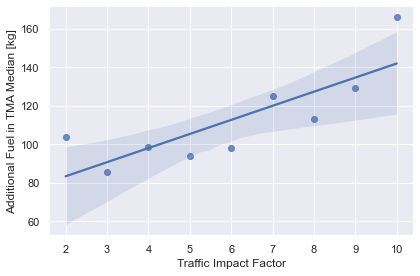

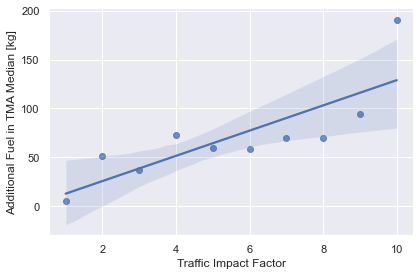

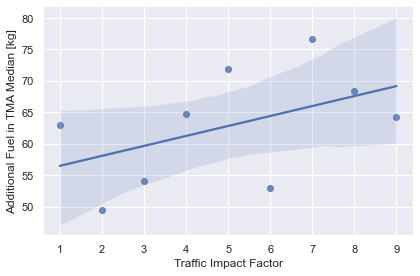

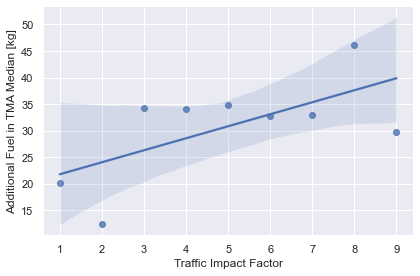

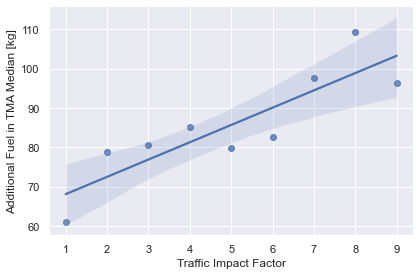

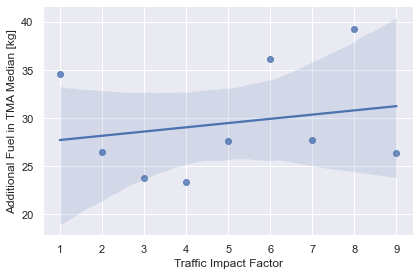

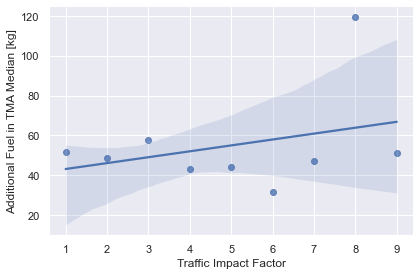

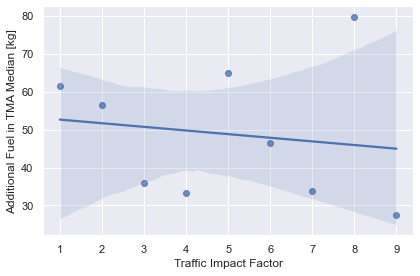

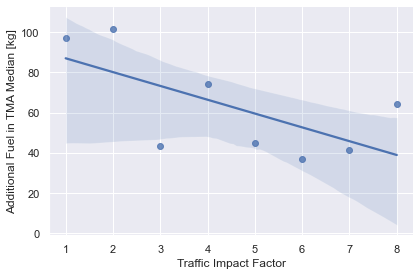

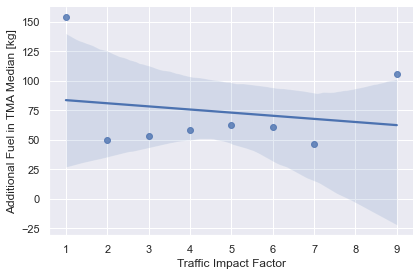

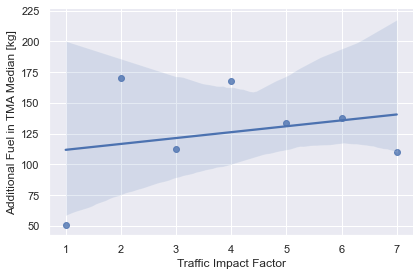

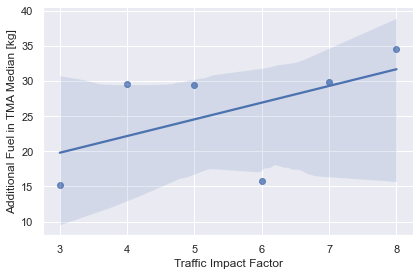

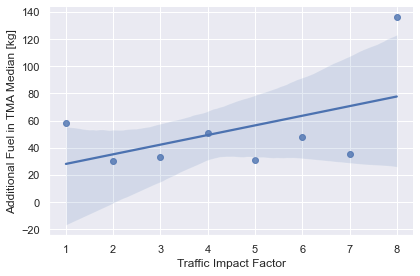

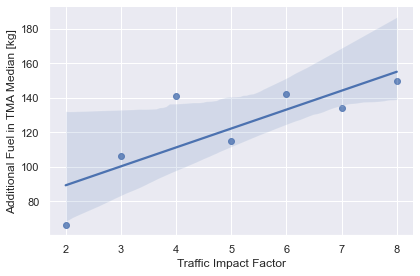

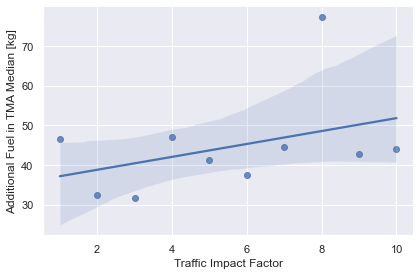

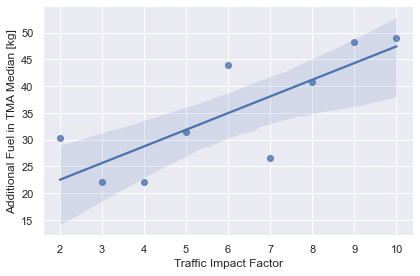

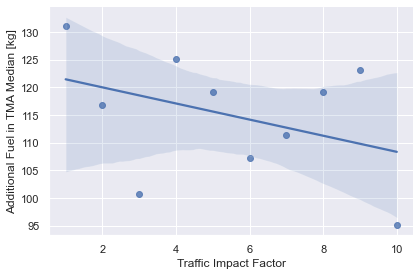

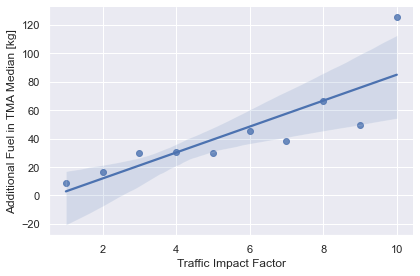

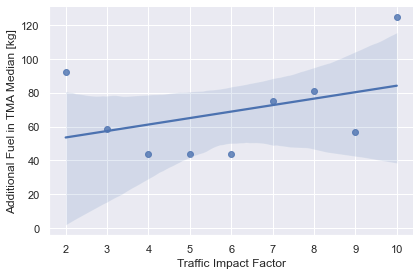

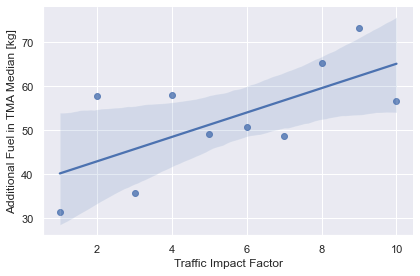

In [8]:
RUNWAYS = ['08', '01L', '01R', '26', '19R', '19L']
CLUSTERS = [1,2,3,4,5,6]

i = -1
for runway in RUNWAYS:
    i = i+1
    for cluster in CLUSTERS:
        df = rwy_metrics_TIF_fuel_by_hour_df_list[i][cluster-1].copy()
        df = df[df['numberOfFlights']>0]

        df.set_index(['TIF'], inplace=True)
        df.sort_index(inplace=True)

        median_df = pd.DataFrame(columns=['TIF', 'addFuelMedian'])

        for idx, group in df.groupby(level='TIF'):
    
            #idx_df = group['addFuelPercentMean']
            idx_df = group['addFuelMean']
    
            idx_median = np.median(idx_df)
            median_df = median_df.append({'TIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)

        median_df['TIF'] = median_df['TIF'].astype(np.float)
        median_df['addFuelMedian'] = median_df['addFuelMedian'].astype(np.float)
        
        sns.set(rc={'figure.figsize':(1,1)})

        sns.lmplot(x='TIF',y='addFuelMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
        plt.xlabel('Traffic Impact Factor')
        plt.ylabel('Additional Fuel in TMA Median [kg]')
        #plt.ylabel('Additional Fuel in TMA Median [%]')
        
        fig_name = "Figures\AddFuelVsTIF\AddFuelVsTIF_runway" + runway + "_cluster" + str(cluster) + ".png"
        #fig_name = "Figures\AddFuelPercentVsTIF\AddFuelPercentVsTIF_runway" + runway + "_cluster" + str(cluster) + ".png"
        plt.savefig(fig_name)

        #statsmodel:
        X_df = median_df[['TIF']]
        y_df = median_df[['addFuelMedian']]

        X2 = sm.add_constant(X_df.values)
        est = sm.OLS(y_df, X2)
        est2 = est.fit()
        print(est2.summary())
        # with outliers - ESGG: 0.84, ESSA: 0.93
        # without outliers - ESGG: 0.86, ESSA: 0.93

## Medians of Average Additional Distance in TMA vs WIF

C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     2.087
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.285
Time:                        15:11:06   Log-Likelihood:                -17.173
No. Observations:                   4   AIC:                             38.35
Df Residuals:                       2   BIC:                             37.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.7629     23.673      3.538      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 26 May 2022   Prob (F-statistic):                nan
Time:                        15:11:06   Log-Likelihood:                 57.243
No. Observations:                   2   AIC:                            -110.5
Df Residuals:                       0   BIC:                            -113.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.3404        inf          0        n

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     7815.
Date:                Thu, 26 May 2022   Prob (F-statistic):            0.00720
Time:                        15:11:06   Log-Likelihood:                -4.4391
No. Observations:                   3   AIC:                             12.88
Df Residuals:                       1   BIC:                             11.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        251.5037      1.819    138.301      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 26 May 2022   Prob (F-statistic):                nan
Time:                        15:11:07   Log-Likelihood:                 57.243
No. Observations:                   2   AIC:                            -110.5
Df Residuals:                       0   BIC:                            -113.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.5690        inf          0        n

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.278
Method:                 Least Squares   F-statistic:                    0.1308
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.742
Time:                        15:11:07   Log-Likelihood:                -24.073
No. Observations:                   5   AIC:                             52.15
Df Residuals:                       3   BIC:                             51.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.6849     40.395      1.948      0.1

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 26 May 2022   Prob (F-statistic):                nan
Time:                        15:11:07   Log-Likelihood:                 55.856
No. Observations:                   2   AIC:                            -107.7
Df Residuals:                       0   BIC:                            -110.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        366.9910        inf          0        n

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.181
Method:                 Least Squares   F-statistic:                   0.08192
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.786
Time:                        15:11:07   Log-Likelihood:                -23.889
No. Observations:                   7   AIC:                             51.78
Df Residuals:                       5   BIC:                             51.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.6361      7.344      5.942      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     3.734
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.111
Time:                        15:11:08   Log-Likelihood:                -29.403
No. Observations:                   7   AIC:                             62.81
Df Residuals:                       5   BIC:                             62.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.8267     16.144      1.414      0.2

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     2.424
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.180
Time:                        15:11:08   Log-Likelihood:                -23.749
No. Observations:                   7   AIC:                             51.50
Df Residuals:                       5   BIC:                             51.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.2581      7.198      4.065      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                 -0.081
Method:                 Least Squares   F-statistic:                    0.5520
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.491
Time:                        15:11:08   Log-Likelihood:                -32.588
No. Observations:                   7   AIC:                             69.18
Df Residuals:                       5   BIC:                             69.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.5595     25.443      1.948      0.1

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.167
Method:                 Least Squares   F-statistic:                    0.1398
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.724
Time:                        15:11:09   Log-Likelihood:                -27.887
No. Observations:                   7   AIC:                             59.77
Df Residuals:                       5   BIC:                             59.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.1392     12.999      3.088      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     1.574
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.278
Time:                        15:11:09   Log-Likelihood:                -20.963
No. Observations:                   6   AIC:                             45.93
Df Residuals:                       4   BIC:                             45.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0755     11.223      4.462      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     6.412
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0524
Time:                        15:11:09   Log-Likelihood:                -24.786
No. Observations:                   7   AIC:                             53.57
Df Residuals:                       5   BIC:                             53.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.8018      8.347      3.451      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     1.531
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.284
Time:                        15:11:09   Log-Likelihood:                -21.458
No. Observations:                   6   AIC:                             46.92
Df Residuals:                       4   BIC:                             46.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.0383     12.188      4.844      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     2.203
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.198
Time:                        15:11:10   Log-Likelihood:                -26.728
No. Observations:                   7   AIC:                             57.46
Df Residuals:                       5   BIC:                             57.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.4124     11.015      6.211      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                 -0.158
Method:                 Least Squares   F-statistic:                    0.1812
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.688
Time:                        15:11:10   Log-Likelihood:                -36.676
No. Observations:                   7   AIC:                             77.35
Df Residuals:                       5   BIC:                             77.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.5309     45.628      2.554      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     4.686
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0827
Time:                        15:11:10   Log-Likelihood:                -33.460
No. Observations:                   7   AIC:                             70.92
Df Residuals:                       5   BIC:                             70.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.9369     28.819      1.559      0.1

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.199
Method:                 Least Squares   F-statistic:                  0.003785
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.953
Time:                        15:11:11   Log-Likelihood:                -20.699
No. Observations:                   7   AIC:                             45.40
Df Residuals:                       5   BIC:                             45.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.7609      4.656     12.836      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.199
Method:                 Least Squares   F-statistic:                  0.003266
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.957
Time:                        15:11:11   Log-Likelihood:                -29.089
No. Observations:                   7   AIC:                             62.18
Df Residuals:                       5   BIC:                             62.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.8766     15.436      4.721      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.244
Method:                 Least Squares   F-statistic:                   0.01882
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.898
Time:                        15:11:11   Log-Likelihood:                -19.310
No. Observations:                   6   AIC:                             42.62
Df Residuals:                       4   BIC:                             42.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.0295      8.519      3.994      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.247
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.315
Time:                        15:11:11   Log-Likelihood:                -28.609
No. Observations:                   7   AIC:                             61.22
Df Residuals:                       5   BIC:                             61.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.2428     14.413      4.041      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.8172
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.417
Time:                        15:11:12   Log-Likelihood:                -19.188
No. Observations:                   6   AIC:                             42.38
Df Residuals:                       4   BIC:                             41.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6041      8.349      2.707      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     1.817
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.236
Time:                        15:11:12   Log-Likelihood:                -38.244
No. Observations:                   7   AIC:                             80.49
Df Residuals:                       5   BIC:                             80.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.8332     57.083      2.695      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     1.945
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.236
Time:                        15:11:12   Log-Likelihood:                -24.389
No. Observations:                   6   AIC:                             52.78
Df Residuals:                       4   BIC:                             52.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7556     19.864      1.246      0.2

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     10.03
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0194
Time:                        15:11:13   Log-Likelihood:                -33.032
No. Observations:                   8   AIC:                             70.06
Df Residuals:                       6   BIC:                             70.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.2496     13.522      1.867      0.1

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.193
Method:                 Least Squares   F-statistic:                   0.03067
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.868
Time:                        15:11:13   Log-Likelihood:                -39.106
No. Observations:                   7   AIC:                             82.21
Df Residuals:                       5   BIC:                             82.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.3652     64.564      1.555      0.1

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                 -0.124
Method:                 Least Squares   F-statistic:                    0.3389
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.586
Time:                        15:11:13   Log-Likelihood:                -41.038
No. Observations:                   7   AIC:                             86.08
Df Residuals:                       5   BIC:                             85.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.1382     85.089      1.247      0.2

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                 -0.089
Method:                 Least Squares   F-statistic:                    0.5918
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.485
Time:                        15:11:13   Log-Likelihood:                -19.383
No. Observations:                   6   AIC:                             42.77
Df Residuals:                       4   BIC:                             42.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.4827      6.761      3.621      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     1.859
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.231
Time:                        15:11:14   Log-Likelihood:                -26.791
No. Observations:                   7   AIC:                             57.58
Df Residuals:                       5   BIC:                             57.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3205     11.115      2.098      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.194
Method:                 Least Squares   F-statistic:                   0.02428
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.882
Time:                        15:11:14   Log-Likelihood:                -31.685
No. Observations:                   7   AIC:                             67.37
Df Residuals:                       5   BIC:                             67.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.9165     22.364      5.407      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                 -0.138
Method:                 Least Squares   F-statistic:                    0.3954
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.564
Time:                        15:11:14   Log-Likelihood:                -19.183
No. Observations:                   6   AIC:                             42.37
Df Residuals:                       4   BIC:                             41.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.4803      8.341      4.254      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     2.884
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.150
Time:                        15:11:14   Log-Likelihood:                -20.618
No. Observations:                   7   AIC:                             45.24
Df Residuals:                       5   BIC:                             45.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.7604      4.602      8.423      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.9568
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.383
Time:                        15:11:15   Log-Likelihood:                -20.654
No. Observations:                   6   AIC:                             45.31
Df Residuals:                       4   BIC:                             44.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.4439     10.658     11.301      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.186
Method:                 Least Squares   F-statistic:                   0.06056
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.815
Time:                        15:11:15   Log-Likelihood:                -30.172
No. Observations:                   7   AIC:                             64.34
Df Residuals:                       5   BIC:                             64.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.4479     18.019      1.801      0.1

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)
C:\Users\anale19\AppData\Local\Temp\ipykernel_18936\3593106162.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

                            OLS Regression Results                            
Dep. Variable:          addFuelMedian   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9985
Date:                Thu, 26 May 2022   Prob (F-statistic):              0.374
Time:                        15:11:15   Log-Likelihood:                -27.603
No. Observations:                   6   AIC:                             59.21
Df Residuals:                       4   BIC:                             58.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.5888     33.938      2.758      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


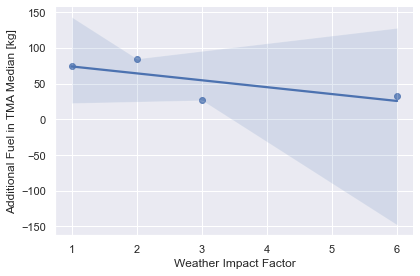

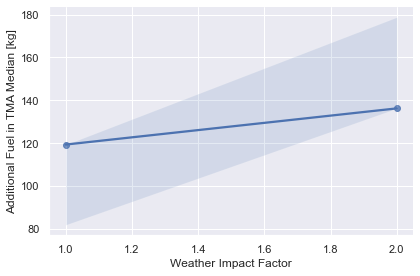

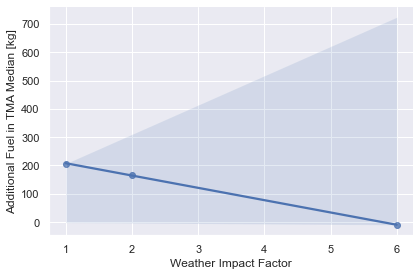

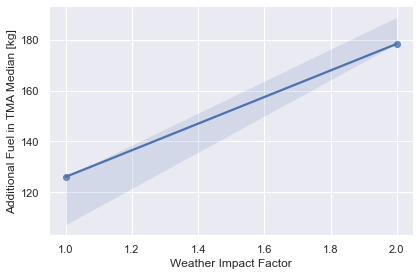

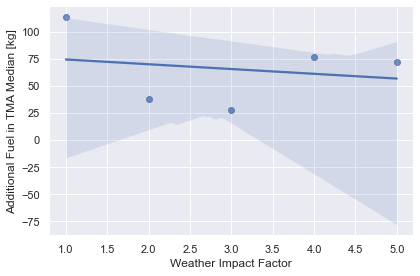

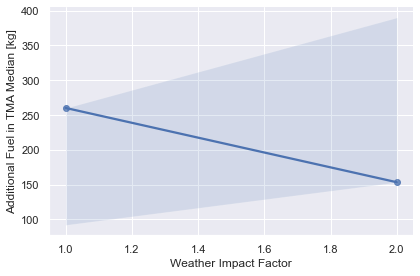

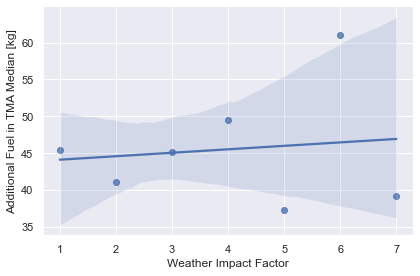

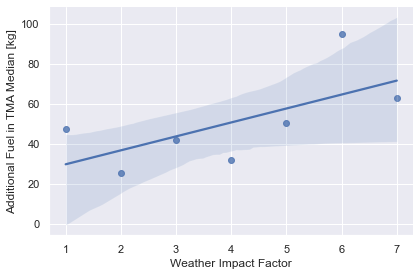

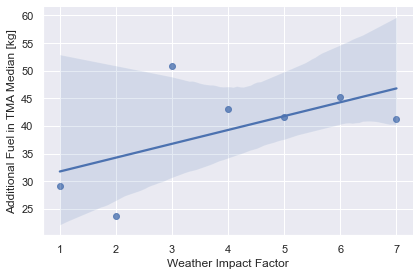

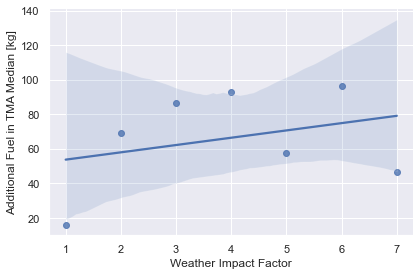

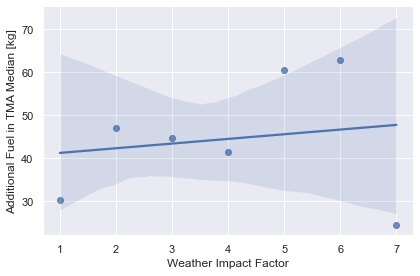

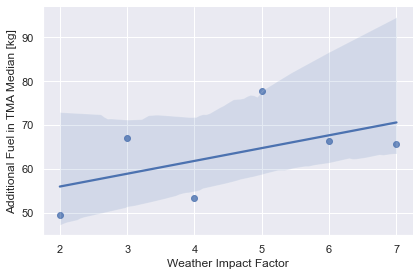

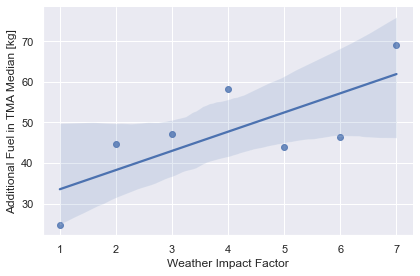

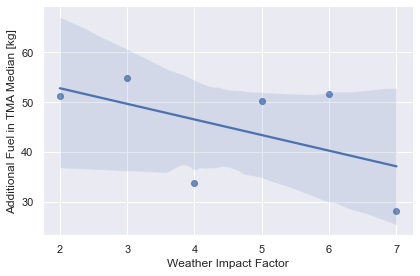

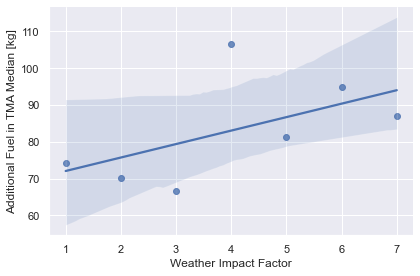

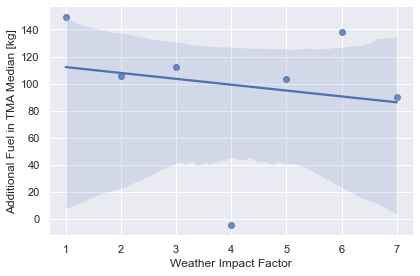

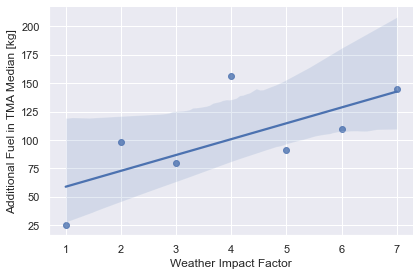

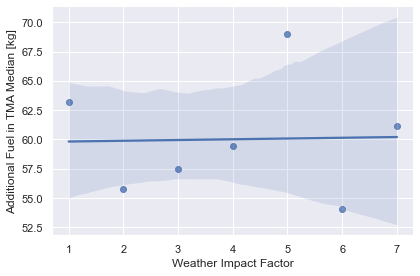

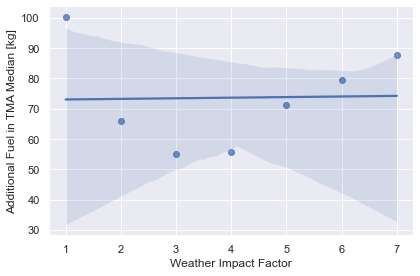

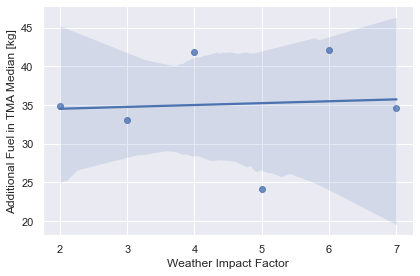

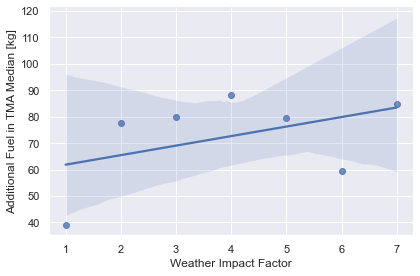

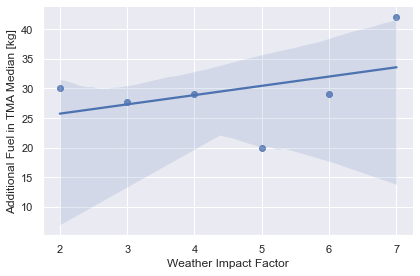

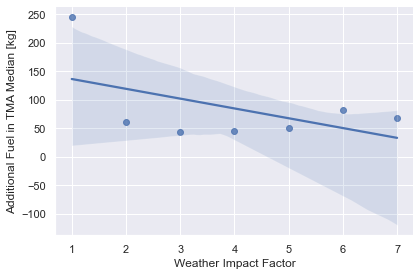

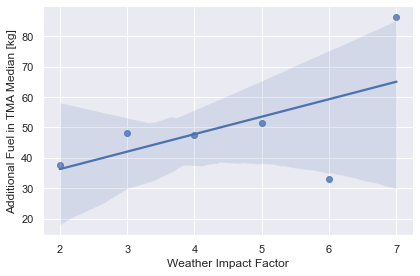

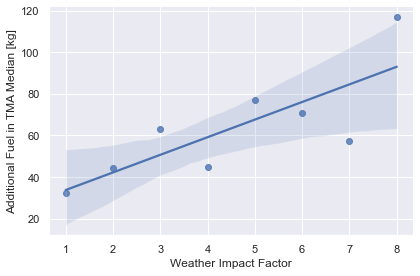

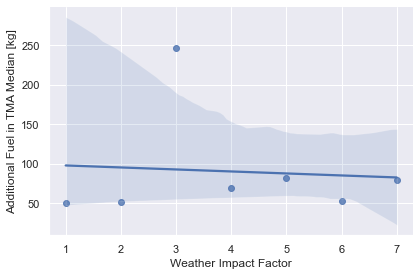

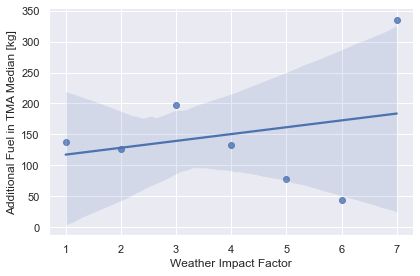

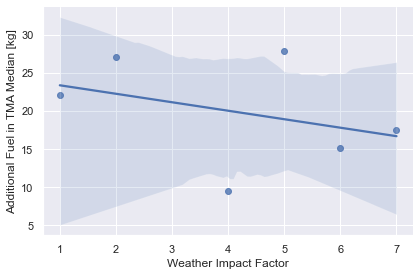

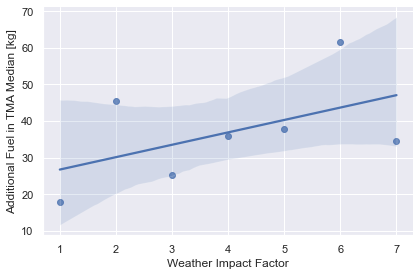

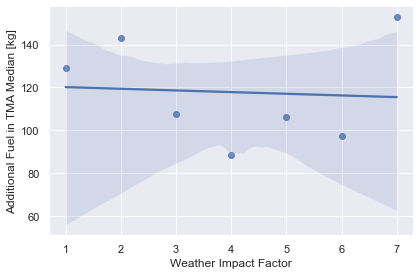

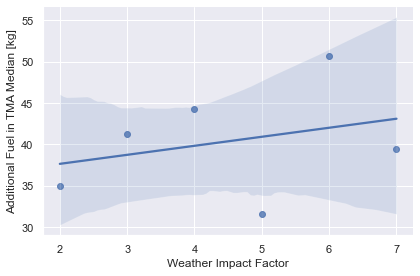

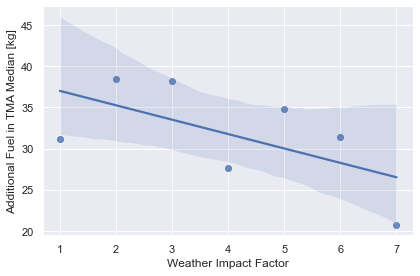

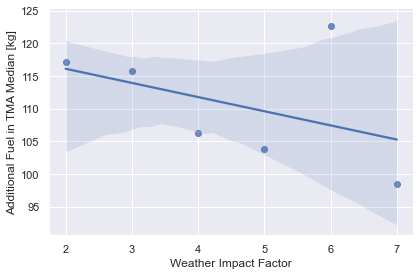

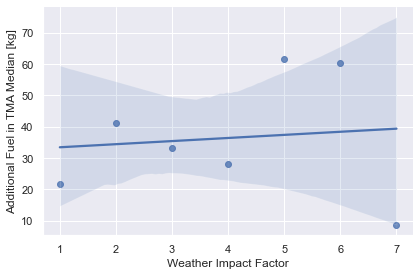

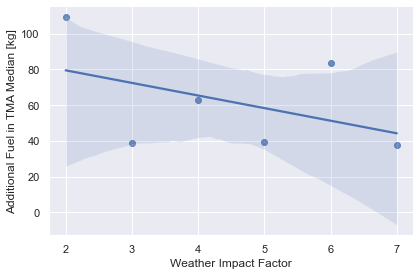

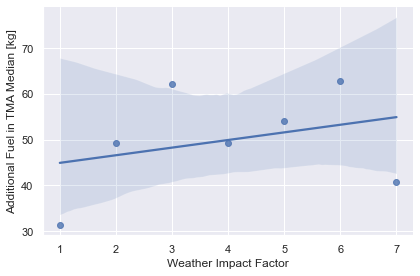

In [9]:
RUNWAYS = ['08', '01L', '01R', '26', '19R', '19L']
CLUSTERS = [1,2,3,4,5,6]

i = -1
for runway in RUNWAYS:
    i = i+1
    for cluster in CLUSTERS:
        df = rwy_metrics_WIF_fuel_by_hour_df_list[i][cluster-1].copy()

        df.dropna(inplace=True)
        df = df[df['numberOfFlights']>0]

        df.set_index(['WIF'], inplace=True)
        df.sort_index(inplace=True)

        median_df = pd.DataFrame(columns=['WIF', 'addFuelMedian'])

        for idx, group in df.groupby(level='WIF'):
    
            #idx_df = group['addFuelPercentMean']
            idx_df = group['addFuelMean']

            idx_median = np.median(idx_df)
            
            median_df = median_df.append({'WIF': idx, 'addFuelMedian': idx_median}, ignore_index=True)

        
        median_df['WIF'] = median_df['WIF'].astype(np.float)
        median_df['addFuelMedian'] = median_df['addFuelMedian'].astype(np.float)
        
        sns.set(rc={'figure.figsize':(1,1)})

        sns.lmplot(x='WIF',y='addFuelMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
        plt.xlabel('Weather Impact Factor')
        plt.ylabel('Additional Fuel in TMA Median [kg]')
        #plt.ylabel('Additional Fuel in TMA Median [%]')
        
        fig_name = "Figures\AddFuelVsWIF\AddFuelVsWIF_runway" + runway + "_cluster" + str(cluster) + ".png"
        #fig_name = "Figures\AddFuelPercentVsWIF\AddFuelPercentVsWIF_runway" + runway + "_cluster" + str(cluster) + ".png"
        plt.savefig(fig_name)
        
        #statsmodel:
        #median_df = median_df[median_df['WIF']<10]
        X_df = median_df[['WIF']]
        y_df = median_df[['addFuelMedian']]
        
        X2 = sm.add_constant(X_df.values)
        est = sm.OLS(y_df, X2)
        est2 = est.fit()
        print(est2.summary()) 
        # with outliers - ESGG: 0.49 ESSA: 0.61
        # without outliers - ESGG: 0.18 ESSA: 0.18